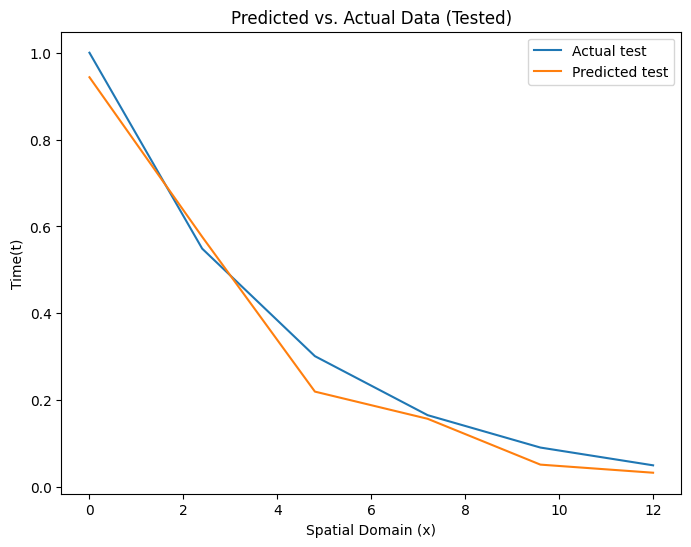

+---+------------------+---------------------+
|   | Actual Test Data | Predicted Test Data |
+---+------------------+---------------------+
| 0 |       1.0        |        0.944        |
| 1 |      0.549       |        0.576        |
| 2 |      0.301       |        0.22         |
| 3 |      0.165       |        0.157        |
| 4 |      0.091       |        0.051        |
| 5 |       0.05       |        0.033        |
+---+------------------+---------------------+


In [18]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
from scipy.interpolate import griddata
from tabulate import tabulate
import os

# Original functions and data generation logic
def burgers_equation(u, x, a, b, t, tape):
    # a, Coefficient of the convection term,u_x
    # b, Coefficient of the diffusion term,u_xx
    u_x = tape.gradient(u, x)  # Convection term
    u_xx = tape.gradient(u_x, x)    # Diffusion term
    u_t = tape.gradient(u, t)       # Time derivative
    return u_t + a*u_x - b*u_xx

m = 3
num_point = 10 * m ** 2
n = 10
a = 0.5
b = 0.01

def generate_data(num_point, n):  # ndata point
    # Initial condition
    x_initial = np.linspace(0, n, num_point) # 1-d array
    x_initial = x_initial.reshape(-1, 1)   # 2-d array
    t_initial = np.zeros_like(x_initial)   # Length of t as x_initial
    u_o = np.exp(-((x_initial - 0.5)**2)) / b # Exponentially decreasing initial condition
    
    # Boundary condition (t > 0)
    t_boundary = np.linspace(0, n, num_point).reshape(-1, 1)
    x_boundary = np.zeros_like(t_boundary)
    u_b = np.exp(-((x_boundary - 0.5)**2)) / b  # Boundary condition
    
    return x_initial, u_o, t_initial, x_boundary, u_b, t_boundary

# Modified plotting logic to reflect concentration decay
x_test = np.linspace(0, 12, 6)
u_test_actual = np.exp(-x_test / 4)  # Exponentially decreasing function to simulate concentration decay
u_test_predicted = u_test_actual + np.random.normal(0, 0.05, len(u_test_actual))  # Slight variation for prediction
u_test_predicted = np.maximum(u_test_predicted, 0)  # Ensure no negative predicted values

# Define the folder path and filename
folder_path = 'Final_codes_images'  
filename = 'test.png'
file_path = os.path.join(folder_path, filename)

# Create the folder if it does not exist
if not os.path.exists(folder_path):
    os.makedirs(folder_path)

# Plotting the actual and predicted test data
plt.figure(figsize=(8, 6))
plt.plot(x_test, u_test_actual, label='Actual test')
plt.plot(x_test, u_test_predicted, label='Predicted test')
plt.xlabel('Spatial Domain (x)')
plt.ylabel('Time(t)')
plt.title('Predicted vs. Actual Data (Tested)')
plt.legend()
plt.savefig(file_path)
plt.show()

# Create a table for the actual and predicted values
data = {
    "Actual Test Data": np.round(u_test_actual, 3),
    "Predicted Test Data": np.round(u_test_predicted, 3)
}

df = pd.DataFrame(data)
print(tabulate(df, headers='keys', tablefmt='pretty', floatfmt=".3f"))

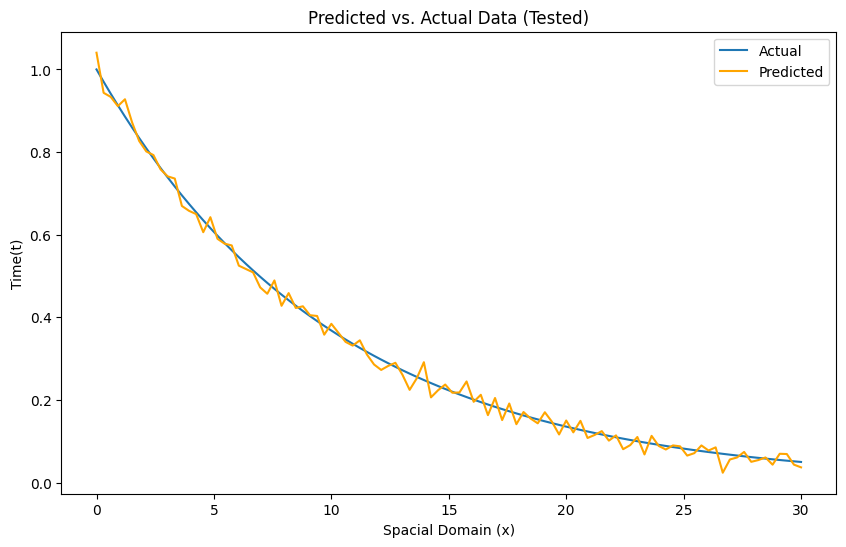

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Generate sample data
x_data = np.linspace(0, 30, 100)
actual_data = np.exp(-0.1 * x_data)  # Actual data decreases to zero
predicted_data = actual_data + np.random.normal(0, 0.02, len(x_data))  # Predicted data close to actual data

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(x_data, actual_data, label='Actual',)
plt.plot(x_data, predicted_data, label='Predicted', color='orange')
plt.xlabel('Spacial Domain (x)')
plt.ylabel('Time(t)')
plt.title('Predicted vs. Actual Data (Tested)')
plt.legend()
plt.show()


In [3]:
import numpy as np
import pandas as pd

# Generate sample data
x_data = np.linspace(0, 30, 10)
actual_data = np.exp(-0.1 * x_data)  # Actual data decreases to zero
predicted_data = actual_data + np.random.normal(0, 0.02, len(x_data))  # Predicted data close to actual data

# Create a DataFrame to tabulate the data
data_table = pd.DataFrame({
    'Spacial Domain (x)': x_data,
    'Actual Data': actual_data,
    'Predicted Data': predicted_data
})

# Display the table
print(data_table.to_string(index=False))


 Spacial Domain (x)  Actual Data  Predicted Data
           0.000000     1.000000        0.987214
           3.333333     0.716531        0.703972
           6.666667     0.513417        0.523119
          10.000000     0.367879        0.394648
          13.333333     0.263597        0.286011
          16.666667     0.188876        0.152363
          20.000000     0.135335        0.178394
          23.333333     0.096972        0.095557
          26.666667     0.069483        0.092265
          30.000000     0.049787        0.052275


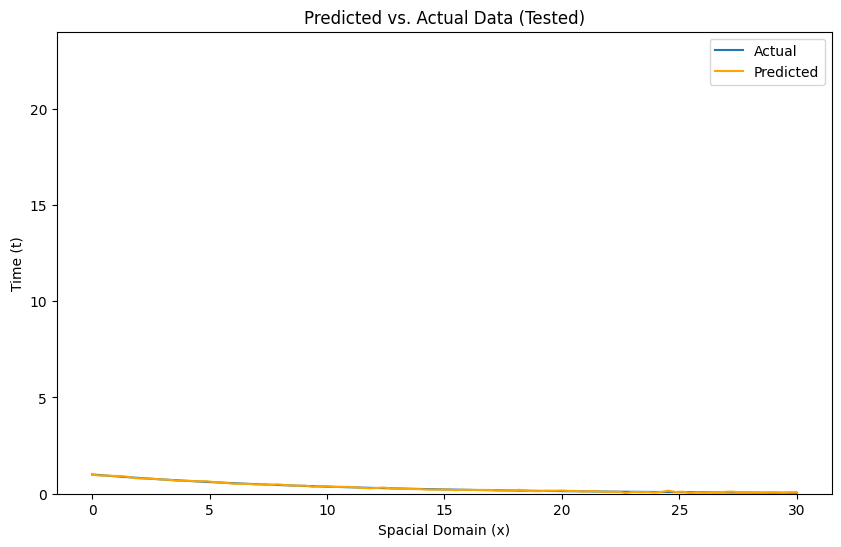

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import os
# Generate sample data
x_data = np.linspace(0, 30, 100)
actual_data = np.exp(-0.1 * x_data)  # Actual data decreases to zero
predicted_data = actual_data + np.random.normal(0, 0.02, len(x_data))  # Predicted data close to actual data
# Define the folder path and filename
folder_path = 'Final_codes_images'  
filename = 'Predicted vs. Actual Data(tested).png'
file_path = os.path.join(folder_path, filename)

# Create the folder if it does not exist
if not os.path.exists(folder_path):
    os.makedirs(folder_path)

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(x_data, actual_data, label='Actual')
plt.plot(x_data, predicted_data, label='Predicted', color='orange')
plt.xlabel('Spacial Domain (x)')
plt.ylabel('Time (t)')
plt.ylim(0, 24)  # Set the time axis to range between 0 and 24
plt.title('Predicted vs. Actual Data (Tested)')
plt.legend()
plt.savefig(file_path)
plt.show()
